# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Ход исследования**

Входные данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, мы получим из файла `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед исследованием понадобится обзор данных.

*Описание данных:*

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Данные за 2016 год могут быть неполными
 
Исследование пройдёт в четыре основных этапа:

1. Обзор данных.
2. Предобработка данных.
3. Расчёты и добавление результатов в таблицу.
4. Исследовательский анализ данных.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков-is_apartment" data-toc-modified-id="Заполнение-пропусков-is_apartment-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Заполнение пропусков <code>is_apartment</code></a></span></li><li><span><a href="#Заполнение-пропусков-parks_nearest,-ponds_nearest,-parks_around3000,-ponds_around3000,-airports_nearest" data-toc-modified-id="Заполнение-пропусков-parks_nearest,-ponds_nearest,-parks_around3000,-ponds_around3000,-airports_nearest-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Заполнение пропусков <code>parks_nearest</code>, <code>ponds_nearest</code>, <code>parks_around3000</code>, <code>ponds_around3000</code>, <code>airports_nearest</code></a></span></li><li><span><a href="#Заполнение-пропусков-balcony" data-toc-modified-id="Заполнение-пропусков-balcony-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Заполнение пропусков <code>balcony</code></a></span></li><li><span><a href="#Заполнение-пропусков-ceiling_height" data-toc-modified-id="Заполнение-пропусков-ceiling_height-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Заполнение пропусков <code>ceiling_height</code></a></span></li><li><span><a href="#Заполнение-пропусков-city_centers_neareast" data-toc-modified-id="Заполнение-пропусков-city_centers_neareast-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Заполнение пропусков <code>city_centers_neareast</code></a></span></li><li><span><a href="#Заполнение-пропусков-ceiling_height-после-заполнения-столбца-city_centers_neareast" data-toc-modified-id="Заполнение-пропусков-ceiling_height-после-заполнения-столбца-city_centers_neareast-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Заполнение пропусков <code>ceiling_height</code> после заполнения столбца <code>city_centers_neareast</code></a></span></li><li><span><a href="#Заполнение-пропусков-days_exposition" data-toc-modified-id="Заполнение-пропусков-days_exposition-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Заполнение пропусков <code>days_exposition</code></a></span></li><li><span><a href="#Заполнение-пропусков-kitchen_area,-living_area" data-toc-modified-id="Заполнение-пропусков-kitchen_area,-living_area-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Заполнение пропусков <code>kitchen_area</code>, <code>living_area</code></a></span></li><li><span><a href="#Заполнение-пропусков-floors_total" data-toc-modified-id="Заполнение-пропусков-floors_total-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>Заполнение пропусков <code>floors_total</code></a></span></li><li><span><a href="#Заполнение-пропусков-locality_name" data-toc-modified-id="Заполнение-пропусков-locality_name-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>Заполнение пропусков <code>locality_name</code></a></span></li></ul></li><li><span><a href="#Перевод-данных-к-нужному-типу" data-toc-modified-id="Перевод-данных-к-нужному-типу-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Перевод данных к нужному типу</a></span><ul class="toc-item"><li><span><a href="#Переведём-в-тип-int" data-toc-modified-id="Переведём-в-тип-int-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Переведём в тип <code>int</code></a></span></li><li><span><a href="#Переведём-в-тип-datetime" data-toc-modified-id="Переведём-в-тип-datetime-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Переведём в тип <code>datetime</code></a></span></li><li><span><a href="#Окрулим-до-1-ого-и-2-х-знаков-после-запятой" data-toc-modified-id="Окрулим-до-1-ого-и-2-х-знаков-после-запятой-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Окрулим до 1-ого и 2-х знаков после запятой</a></span></li></ul></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Расчёт-цены-квадратного-метра" data-toc-modified-id="Расчёт-цены-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчёт цены квадратного метра</a></span></li><li><span><a href="#Добавление-дня-недели,-месяца-и-года-публикации" data-toc-modified-id="Добавление-дня-недели,-месяца-и-года-публикации-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Добавление дня недели, месяца и года публикации</a></span></li><li><span><a href="#Добаление-категорий-этажа-квартиры" data-toc-modified-id="Добаление-категорий-этажа-квартиры-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Добаление категорий этажа квартиры</a></span></li><li><span><a href="#Добавление-соотношения-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей." data-toc-modified-id="Добавление-соотношения-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Добавление соотношения жилой и общей площади, а также отношение площади кухни к общей.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров: площадь, цена, число комнат, высота потолков</a></span><ul class="toc-item"><li><span><a href="#Гистограмма-распределения-значений-площади" data-toc-modified-id="Гистограмма-распределения-значений-площади-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Гистограмма распределения значений площади</a></span></li><li><span><a href="#Гистограмма-распределения-значений-цены" data-toc-modified-id="Гистограмма-распределения-значений-цены-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Гистограмма распределения значений цены</a></span></li><li><span><a href="#Гистограмма-распределения-значений-кол-ва-комнат" data-toc-modified-id="Гистограмма-распределения-значений-кол-ва-комнат-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Гистограмма распределения значений кол-ва комнат</a></span></li><li><span><a href="#Гистограмма-распределения-значений-высоты-потолков" data-toc-modified-id="Гистограмма-распределения-значений-высоты-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Гистограмма распределения значений высоты потолков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения-времени-продажи-квартиры" data-toc-modified-id="Редкие-и-выбивающиеся-значения-времени-продажи-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Редкие и выбивающиеся значения времени продажи квартиры</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-числа-комнат" data-toc-modified-id="Зависимость-цены-от-числа-комнат-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Зависимость цены от числа комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удалённости-от-центра" data-toc-modified-id="Зависимость-цены-от-удалённости-от-центра-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Зависимость цены от удалённости от центра</a></span></li><li><span><a href="#Зависимость-цены-от-этажа-квартиры" data-toc-modified-id="Зависимость-цены-от-этажа-квартиры-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Зависимость цены от этажа квартиры</a></span></li><li><span><a href="#Зависимость-цены-от-даты-размещения" data-toc-modified-id="Зависимость-цены-от-даты-размещения-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Зависимость цены от даты размещения</a></span></li></ul></li><li><span><a href="#Срез-по-10-населённым-пунктам-с-наибольшим-числом-объявлений." data-toc-modified-id="Срез-по-10-населённым-пунктам-с-наибольшим-числом-объявлений.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Срез по 10 населённым пунктам с наибольшим числом объявлений.</a></span></li><li><span><a href="#Выделение-квартир-в-Санкт-Петербурге" data-toc-modified-id="Выделение-квартир-в-Санкт-Петербурге-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выделение квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Исследование-сегмента-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Исследование-сегмента-квартир-в-центре-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Исследование сегмента квартир в центре Санкт-Петербурга</a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат-и-высота-потолков-в-центре-Санкт-Петербурга" data-toc-modified-id="Площадь,-цена,-число-комнат-и-высота-потолков-в-центре-Санкт-Петербурга-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Площадь, цена, число комнат и высота потолков в центре Санкт-Петербурга</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-4.7.2.1"><span class="toc-item-num">4.7.2.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-числа-комнат" data-toc-modified-id="Зависимость-цены-от-числа-комнат-4.7.2.2"><span class="toc-item-num">4.7.2.2&nbsp;&nbsp;</span>Зависимость цены от числа комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удалённости-от-центра" data-toc-modified-id="Зависимость-цены-от-удалённости-от-центра-4.7.2.3"><span class="toc-item-num">4.7.2.3&nbsp;&nbsp;</span>Зависимость цены от удалённости от центра</a></span></li><li><span><a href="#Зависимость-цены-от-этажа-квартиры" data-toc-modified-id="Зависимость-цены-от-этажа-квартиры-4.7.2.4"><span class="toc-item-num">4.7.2.4&nbsp;&nbsp;</span>Зависимость цены от этажа квартиры</a></span></li><li><span><a href="#Зависимость-цены-от-даты-размещения" data-toc-modified-id="Зависимость-цены-от-даты-размещения-4.7.2.5"><span class="toc-item-num">4.7.2.5&nbsp;&nbsp;</span>Зависимость цены от даты размещения</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

Загрузим необходимые для исследования библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Setup complete')

Setup complete


Загрузим файл и присвоим его переменной `df`. Выведем первые 15 строк.

In [3]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о данных.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Так же вызовем метод `describe()` ко всему датафрейму для получения статистической информации о данных в всех столбцах.

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод**   
По полученным данным можно сделать первые выводы по каждому столбцу:

- `airports_nearest` — имеются пропущенные значения, нулевые значения в расстоянии.
- `balcony` — имеются пропущенные значения, тип данных следует перевести в целочисленный.
- `ceiling_height` — имеются пропущенные значения, аномально большое (100 м) и аномально маленькое (1 м) значения.
- `cityCenters_nearest` — наименование столбца необходимо привести к змеиному регистру, меются пропущенные значения.
- `days_exposition` — меются пропущенные значения, тип данных следует перевести в целочисленный.
- `first_day_exposition` — тип данных следует перевести в `datetime`.
- `floors_total` — имеются пропущенные значения, аномально большое значение (60 этажей, в то время как самый высокий жилой дом Петербурга – 37 этажей), тип данных следует перевести в целочисленный.
- `is_apartment` — имеются пропущенные значения, тип данных следует перевести в `bool`.
- `kitchen_area` — имеются пропущенные значения, аномально большое (112 м²) и аномально маленькое (1.3 м²) значения.
- `last_price` — тип данных следует перевести в целочисленный.
- `living_area` — имеются пропущенные значения, аномально большое (409.7 м²) и аномально маленькое (2 м²) значения.
- `locality_name` — имеются пропущенные значения.
- `parks_around3000` — имеются пропущенные значения, тип данных следует перевести в целочисленный.
- `parks_nearest` — имеются пропущенные значения, аномально маленькое (1 м) значение.
- `ponds_around3000` — имеются пропущенные значения, тип данных следует перевести в целочисленный.
- `ponds_nearest` — имеются пропущенные значения.
- `rooms` — имеются аномально большое (19 комнат) и аномально маленькое (0 комнат) значения.
- `total_area` — имеется аномально большое (900 м²) значение.

## Предобработка данных   
Выполним необходимую для исследования предобработку данных.   
Для начала заменим название столбца `cityCenters_nearest` на `city_centers_nearest`

In [6]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_neareast'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_neareast',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Заполнение пропусков    
Посмотрим процент пропусков по каждому столбцу.

In [7]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).round(1)

is_apartment             88.3
parks_nearest            65.9
ponds_nearest            61.6
balcony                  48.6
ceiling_height           38.8
airports_nearest         23.4
city_centers_neareast    23.3
ponds_around3000         23.3
parks_around3000         23.3
days_exposition          13.4
kitchen_area              9.6
living_area               8.0
floors_total              0.4
locality_name             0.2
total_images              0.0
last_price                0.0
studio                    0.0
floor                     0.0
rooms                     0.0
first_day_exposition      0.0
total_area                0.0
open_plan                 0.0
dtype: float64

Кол-во пропусков достаточно большое. Отсюда начнём по порядку по каждому столбцу.

#### Заполнение пропусков `is_apartment`   
Посмотрим кол-во уникальных значений в данном столбце

In [8]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Скорее всего значения просто не были выбраны, так как не все понимали что является аппартаментами. Заполнить пропущенные значения `False` будет не корректным, так как на выборку из >20000 будет приходится всего 50 аппартаментов, что не выглядит правдободобным. Возможно так же что данные значения пояивлись не с самого начала сбора данных. Пропущенные значения оставим без изменения.

#### Заполнение пропусков `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000`, `airports_nearest`   
Эти значения получены автоматически на основе картографических данных.   
Вполне возможно, что данные не были выгружены системой. Беря в расчет то, что это далеко не самые важные параметры, и отсутствие возможности проставить какие-либо адекватные расстояния, которые не испортят статистику по уже присутствующим данным по этим столбцам, предлагаю здесь не трогать пропуски, учитывая, что есть достаточное количество строк, где данные присутствуют. Так же эти данные не будут использоваться в дальнейшем исследовании.

#### Заполнение пропусков `balcony`   
Здесь очевидно пропущенные значения подразумевают отсутвие балкона. Заменим все пропущенные значения на "0" и посмотрим на кол-во всех уникальных значений.

In [9]:
df.balcony.fillna(0, inplace=True)
df.balcony.value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

#### Заполнение пропусков `ceiling_height`   
Здесь очевидно пропущенные значения просто не были проставлены пользователем. Посмотрим от чего больше всего зависит высота потолков.

In [10]:
abs(df.corr()['ceiling_height']).sort_values(ascending=False)

ceiling_height           1.000000
total_area               0.095490
city_centers_neareast    0.091689
living_area              0.090650
kitchen_area             0.087641
last_price               0.085430
ponds_around3000         0.078209
parks_around3000         0.065915
ponds_nearest            0.059090
rooms                    0.054457
open_plan                0.042777
balcony                  0.031216
floors_total             0.028732
airports_nearest         0.023947
parks_nearest            0.019167
days_exposition          0.019091
floor                    0.011798
total_images             0.001987
studio                   0.001674
Name: ceiling_height, dtype: float64

Высота потолков больше всего зависит от общей площади, удалённости от центра и жилой площади. 
Для того что бы заполнить эти пропуски нам потребуется заполнить пропуски для `city_centers_neareast`

#### Заполнение пропусков `city_centers_neareast`   
Предположим что значения пропущены в основном для области, так как находятся за пределами города.   
Посмотрим количество по населённым пунктам, где заполнено значение удалённости от центра.

In [11]:
print(df['city_centers_neareast'].isna().sum())
df.groupby('locality_name')['city_centers_neareast'].count().sort_values(ascending=False).head(30)

5519


locality_name
Санкт-Петербург                          15660
посёлок Шушары                             436
Пушкин                                     368
Колпино                                    337
посёлок Парголово                          327
Петергоф                                   201
Сестрорецк                                 183
Красное Село                               176
Ломоносов                                  132
Кронштадт                                   95
посёлок Металлострой                        66
посёлок Стрельна                            44
Павловск                                    38
Зеленогорск                                 24
посёлок Понтонный                           20
посёлок Сапёрный                             6
посёлок Молодёжное                           5
посёлок Песочный                             4
посёлок Репино                               4
поселок Мурино                               2
посёлок Усть-Ижора                           2

Больше половины значений имеются для Санкт-Петербурга. Заполним пропуски медианными значениям по населённому пункту где это возможно. Для остальных заполним медианным значеним для области в целом.

In [12]:
#Filling the gaps in 'city_centers_neareast' depended to 'locality_name' where it is possible
df['city_centers_neareast'] = df['city_centers_neareast'].fillna(df.groupby('locality_name')
                                               ['city_centers_neareast'].transform('median'))
#Filling the rest gaps in 'city_centers_neareast' by median for region
df['city_centers_neareast'] = (df['city_centers_neareast']
                               .fillna(df[df['locality_name'] != 'Санкт-Петербург']
                                       ['city_centers_neareast'].median()))
df['city_centers_neareast'].isna().sum()

0

Заполнение этих пропусков нам поможет заплонить пропуски для столбца `ceiling_height` ниже.

#### Заполнение пропусков `ceiling_height` после заполнения столбца `city_centers_neareast`   

Заполним пропущенные значения высоты потолков медианой в зависимости от удалённости от центра и общей площади.

In [13]:
#Filling the gaps in 'ceiling_height' depended to 'city_centers_neareast' where it is possible
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby(['city_centers_neareast'])
                                               ['ceiling_height'].transform('median'))
print(f'Осталось {(df["ceiling_height"].isna().sum() / df.shape[0] * 100).round(2)} процентов пропусков в данном столбце')

Осталось 9.16 процентов пропусков в данном столбце


Всё еще остались пропуски. Заполним их медианными значениями в зависимости от наименования населённого пункта.

In [14]:
#Filling the gaps in 'ceiling_height' depended to 'locality_name' where it is possible
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby(['locality_name'])
                                               ['ceiling_height'].transform('median'))
print(f'Осталось {(df["ceiling_height"].isna().sum() / df.shape[0] * 100).round(2)} процентов пропусков в данном столбце')

Осталось 0.07 процентов пропусков в данном столбце


#### Заполнение пропусков `days_exposition`   
Очень значимый параметр, по которому пропуски не понятны. Возможно что объявления ещё не были закрыты на платформе, даже после фактической продажи квартиры или же квартира ещё находиться в продаже. По той же причине могут быть большие сроки продажи. Оставим эти пропуски без заполнения

#### Заполнение пропусков `kitchen_area`, `living_area`   
Вероятнее всего пользователи просто не указывали эти значения, когда имеется значение общей площади. Особенно в случае квартир студий, где нет чёткого разделения на кухню и жилую площадь. Посмотрим ещё раз кол-во пропусков по этим столбцам.

In [15]:
df[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    2278
living_area     1903
dtype: int64

Проверим нашу теорию, что данные значения не указаны прежде всего для студий.

In [16]:
df.query('studio == True')[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    149
living_area      10
dtype: int64

Теория верна, остаются не значительное кол-во пропусков. Оставляем их без заполнения.

#### Заполнение пропусков `floors_total`
Значения скорее всего просто не заполнены пользователем по разным возможным причинам, например: здание имеет всего один этаж, не знание общего кол-ва этажей и т.д. Посмотрим ещё раз на кол-во пропусков в данном столбце.

In [17]:
df['floors_total'].isna().sum()

86

Посмотрим так же корреляцию по данному столбцу.

In [18]:
abs(df.corr()['floors_total']).sort_values(ascending=False)

floors_total             1.000000
floor                    0.678059
parks_around3000         0.252833
rooms                    0.228215
balcony                  0.172812
living_area              0.169311
kitchen_area             0.163944
ponds_around3000         0.122735
airports_nearest         0.108288
parks_nearest            0.097527
city_centers_neareast    0.081110
total_area               0.075774
studio                   0.070151
days_exposition          0.052234
open_plan                0.050791
ponds_nearest            0.038864
ceiling_height           0.023716
total_images             0.010427
last_price               0.006984
Name: floors_total, dtype: float64

Самая большая зависимость это от этажа квартиры, что было очевидно.   
Для начала попробуем заполнить этажнось в зависимости от населённого пункта и удалённости от центра, возможно объявления могут быть в одном и том же доме. Что бы избежать ошибок, вроде занчение этажа больше этажности, будем также группировать по этажу. Заполним значения медианой, так как ошибки в заполнении так же могут присутсвовать.

In [19]:
#Filling the gaps in 'floors_total' depended to 'locality_name', 
#'city_centers_neareast' and 'floor' where it is possible
df['floors_total'] = df['floors_total'].fillna(df.groupby(['locality_name', 'city_centers_neareast', 'floor'])
                                               ['floors_total'].transform('median'))
df['floors_total'].isna().sum()

61

Осталось 61 пропущенное значение. Оставим их без изменения, с ними мы сейчас ничего сделать не сможем.

#### Заполнение пропусков `locality_name`
Значения пропущены по не понятной причине. Возможно пользователь не указывал населённый пункт, так как подразумевал что это Санкт-Петербург. Посмотрим есть ли для этих этих строк значение удалённости от центра.

In [20]:
print(df['locality_name'].isna().sum())
df[df['locality_name'].isna()][['locality_name', 'city_centers_neareast']].head()

49


,locality_name,city_centers_neareast
1097,NaN,4258.0
2033,NaN,30296.0
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0


Здесь мы можем только присвоить пропущенным значениям город Санкт-Петербург, если удалённость от центра не превышает медианное для города. Посмотрим медианное значение для Санкт-Петербурга.

In [21]:
df.query('locality_name == "Санкт-Петербург"')['city_centers_neareast'].median()

12244.5

Заполним пропущенные значения и посчитаем кол-во оставшихся.

In [22]:
#Filling the gaps in 'locality_name' by "Санкт-Петербург" depended to distance from 'city_centers_neareast' where it is possible
df.loc[(df['locality_name'].isna()) & (df['city_centers_neareast'] < 12244.5), 'locality_name'] = (df
                                                                                                   .loc[(df['locality_name'].isna()) & (df['city_centers_neareast'] < 12244.5), 'locality_name']
                                                                                                   .fillna('Санкт-Петербург')
                                                                                                  )
df['locality_name'].isna().sum()

23

Было 49 пропущенных значений, стало 23. Оставляем их без изменений.

**Вывод**   
Было достаточно большое кол-во пропусков. Часть из них удалось заполнить, часть оставили без вмешательства.   
Что бы избежать пропусков в обозначении аппартаментов следует подставлять значение по умолчанию, если другого не указано пользователем.   
Что касаемо геоданных, которые система заполняет автоматически, вероятнее всего что она не определяет местоположение некотрых населённых пунктов и, соответсвенно, удалённость от аэропорта и центра города, ближайшие парки и парковки и их количество в радиусе 3 км. Или же система не определяет написанное пользователем.
Заполнили так же пропущенные значения высоты потолка и этажности дома исходя из примерного расположения дома. Эти значения так же могут быть заполнены автоматически, если пользователь правильно указывает адрес.   
До конца так и не ясны пропуски в днях размещения объявления.

### Перевод данных к нужному типу   
Заменим тип данных в столбцах с целочисленными значениям на `int` для сокращения памяти, столбцы с вещественным типом округлим до необходимых нам значений, столбцы с датой переведём в формат даты. Посмотрим текущий формат по всем столбцам.

In [23]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23699 non-null  int64  
 1   last_price             23699 non-null  float64
 2   total_area             23699 non-null  float64
 3   first_day_exposition   23699 non-null  object 
 4   rooms                  23699 non-null  int64  
 5   ceiling_height         23682 non-null  float64
 6   floors_total           23638 non-null  float64
 7   living_area            21796 non-null  float64
 8   floor                  23699 non-null  int64  
 9   is_apartment           2775 non-null   object 
 10  studio                 23699 non-null  bool   
 11  open_plan              23699 non-null  bool   
 12  kitchen_area           21421 non-null  float64
 13  balcony                23699 non-null  float64
 14  locality_name          23676 non-null  object 
 15  ai

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_neareast,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Переведём в тип `int`   
`airports_nearest`, `balcony`, `city_centers_neareast`, `days_exposition`, `floors_total`, `last_price`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`


In [24]:
to_int_list = ['airports_nearest', 'balcony', 'city_centers_neareast', 
               'days_exposition', 'floors_total', 'last_price',
               'parks_around3000', 'parks_nearest', 'ponds_around3000', 
               'ponds_nearest']
for column in to_int_list:
    df[column] = df[df[column].notnull()][column].astype('int')

#### Переведём в тип `datetime`   
`first_day_exposition` Оставим только дату, так как время не указано.

In [25]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

#### Окрулим до 1-ого и 2-х знаков после запятой   
`ceiling_height`, `kitchen_area`, `living_area`, `total_area`

In [26]:
round_to_one = ['kitchen_area', 'living_area', 'total_area']
for column in round_to_one:
    df[column] = df[df[column].notna()][column].round(1)
df['ceiling_height'] = df[df['ceiling_height'].notna()]['ceiling_height'].round(2)

Проверим наши результаты

In [27]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23699 non-null  int64         
 1   last_price             23699 non-null  int32         
 2   total_area             23699 non-null  float64       
 3   first_day_exposition   23699 non-null  datetime64[ns]
 4   rooms                  23699 non-null  int64         
 5   ceiling_height         23682 non-null  float64       
 6   floors_total           23638 non-null  float64       
 7   living_area            21796 non-null  float64       
 8   floor                  23699 non-null  int64         
 9   is_apartment           2775 non-null   object        
 10  studio                 23699 non-null  bool          
 11  open_plan              23699 non-null  bool          
 12  kitchen_area           21421 non-null  float64       
 13  b

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_neareast,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,3.00,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121.0


В столбцах, где были пропуски тип не изменился, что было ожидаемо.

## Расчёты и добавление результатов в таблицу   
Рассчитаем следующие показатели:   
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Расчёт цены квадратного метра

In [28]:
df['price_per_square'] = (df['last_price'] / df['total_area']).astype('int')

### Добавление дня недели, месяца и года публикации

In [29]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
#Let's replace weekdays number by name of weekdays
weekday_dict = {0: 'понедельник', 1: 'вторник', 2: 'среда', 3: 'четверг', 
                    4: 'пятница', 5: 'суббота', 6: 'воскресенье'}
df['weekday_exposition'] = df['weekday_exposition'].map(weekday_dict)
#Creating columns with month and year of ad publishing
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
#Checking results
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_neareast,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028,1.0,482.0,2.0,755.0,NaN,120370,четверг,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,18603,0.0,NaN,0.0,NaN,81.0,82920,вторник,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,...,13933,1.0,90.0,2.0,574.0,558.0,92785,четверг,8,2015
3,0,64900000,159.0,2015-07-24,3,3.00,14.0,NaN,9,NaN,...,6800,2.0,84.0,3.0,234.0,424.0,408176,пятница,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098,2.0,112.0,1.0,48.0,121.0,100000,вторник,6,2018


### Добаление категорий этажа квартиры   
Для этого напишем функцию, что бы присвоить категорию в зависимости от этажа.

In [30]:
def floor_categorize(row):
    '''The function returns category of floor: firts, last or other'''
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == last_floor:
        return 'последний'
    if 1 < floor < last_floor:
        return 'другой'
df['floor_category'] = df.apply(floor_categorize, axis=1)

### Добавление соотношения жилой и общей площади, а также отношение площади кухни к общей.

In [31]:
df['living_area_ratio'] = (df['living_area'] / df['total_area']).round(2)
df['kitchen_area_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,NaN,120370,четверг,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82920,вторник,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92785,четверг,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,3.00,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408176,пятница,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100000,вторник,6,2018,другой,0.32,0.41


## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков
Для начала переведём значения цен в тысячи, для более корректного отображения. 

In [32]:
df['last_price'] = (df['last_price'] / 1000).astype('int')
df['price_per_square'] = (df['price_per_square'] / 1000).round(3)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,NaN,120.370,четверг,3,2019,другой,0.47,0.23
1,7,3350,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82.920,вторник,12,2018,первый,0.46,0.27
2,10,5196,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92.785,четверг,8,2015,другой,0.61,0.15
3,0,64900,159.0,2015-07-24,3,3.00,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408.176,пятница,7,2015,другой,NaN,NaN
4,2,10000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100.000,вторник,6,2018,другой,0.32,0.41


Теперь вызовем метод `.describe()` для этих стоблцов и посмотрим значения.  

In [33]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23682.000000
mean,60.348635,6541.532723,2.070636,2.742229
std,35.654086,10887.008378,1.078405,1.048725
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.550000
50%,52.000000,4650.000000,2.000000,2.650000
75%,69.900000,6800.000000,3.000000,2.750000
max,900.000000,763000.000000,19.000000,100.000000


Предварительно можно сказать следующее:   
Площадь имеет выбросы до максимальных 900 м² и минимальную 12 м², но среднее 60 м² и медиана 52 м², что выглядит правдободобным.   
Цена имеет разброс от 12 тыся до 763 млн, но среденее и медина выглядят правдоподобно.   
Кол-во комнат от 0(студии) и максимально может быть 19 комнат (возможно это большой дом или не жилое помещение).   
Высота потолков так же имеет выбросы 1 м и 100 м, среднее 2,74 м и медиану 2,65 м, что похоже на действительное.   

Далее построим диаграммы размаха по этим параметрам, чтобы оценить границы нормальных значений.

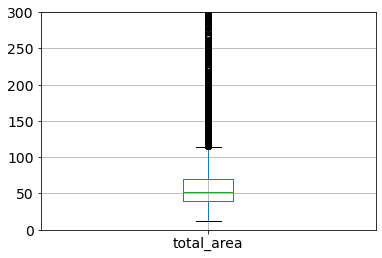

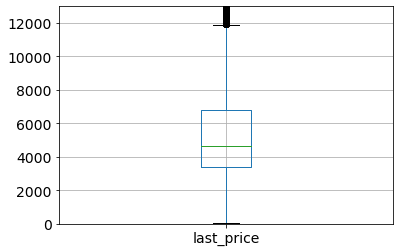

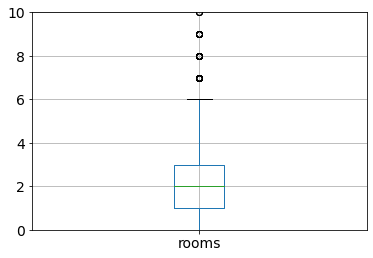

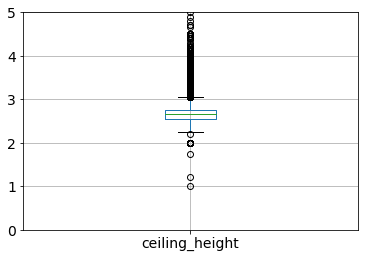

In [34]:
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [300, 13000, 10, 5]

for i in range(len(ylims)):
    df.boxplot(column_list[i], fontsize=14)
    plt.ylim(0, ylims[i])
    plt.show()

Здесь мы можем определить примерные границы нормальных значений:   
- `total_area` - 18 - 130 м²
- `last_price` - 0 - 12 млн р.
- `rooms` - 0 - 6 комнат
- `ceiling_height` - 2,3 - 3,3 м   

Построим гистограммы по этим столбцам

#### Гистограмма распределения значений площади

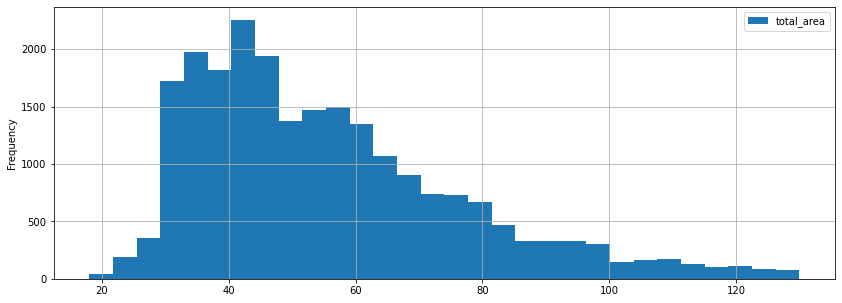

In [35]:
df.plot(y = 'total_area', kind = 'hist', bins = 30, grid=True, figsize = (14,5), range=(18,130));

Больше всего квартир с площадью от 40 до 50 м²

#### Гистограмма распределения значений цены

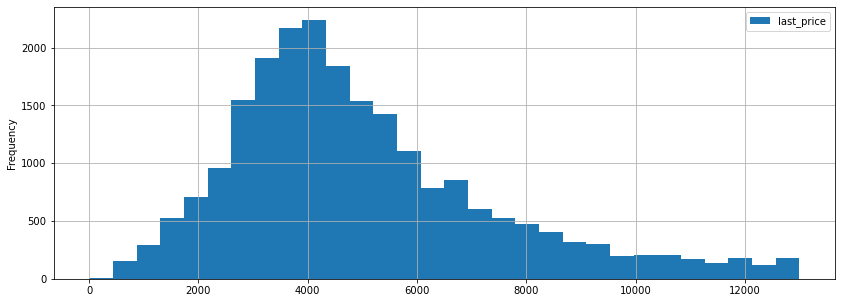

In [36]:
df.plot(y = 'last_price', kind = 'hist', bins = 30, grid=True, figsize = (14,5), range=(0,13000));

В данной выборке больше всего квартир с ценой в районе 4 млн.р.

#### Гистограмма распределения значений кол-ва комнат

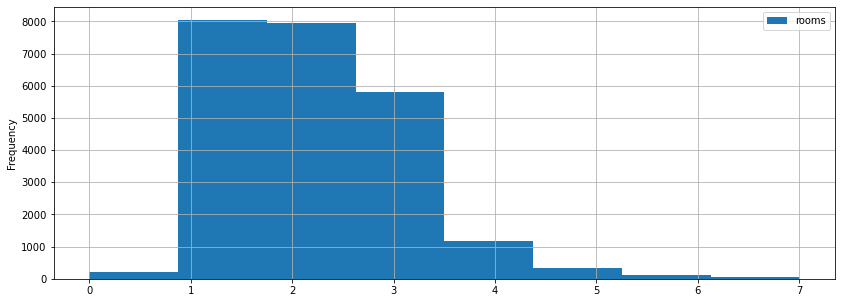

In [37]:
df.plot(y = 'rooms', kind = 'hist', bins = 8, grid=True, figsize = (14,5), range=(0,7));

В нашей выборке больше квартир с одной и двумя комнатами.

#### Гистограмма распределения значений высоты потолков

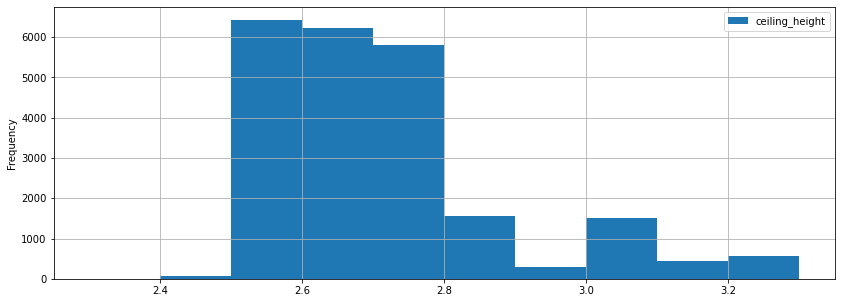

In [38]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (14,5), range=(2.3, 3.3));

Чаще всего в нашей выборке встречаются квартиры с высотой потолков 2,5-2,6 м

#### Вывод   
1. **Гистограмма распределения значений площади** - Основная доля квартир имеет метраж от 30 до 80 м², пик приходится на 45 м². Есть квартиры и по 800м, но это единичные выбросы.   
2. **Гистограмма распределения значений цены** - Цены варьируются в пределах от 3 до 12 млн.р. Чаще всего квартиры имеют стоимость от 3 до 6 млн.р.   
3. **Гистограмма распределения значений кол-ва комнат** - В выборке имеются квартиры 0(студии) до 19 комнат. Чаще всего встречаются 1 и 2-х комнатные квартиры.   
4. **Гистограмма распределения значений высоты потолков** - Чаще всего встречаются квартиры с потолками от 2,5 до 3,2, остальные можно считать экслюзивными.

### Изучение времени продажи квартиры   
Изучим данные и построим гистограмму по времени продажи квартир.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


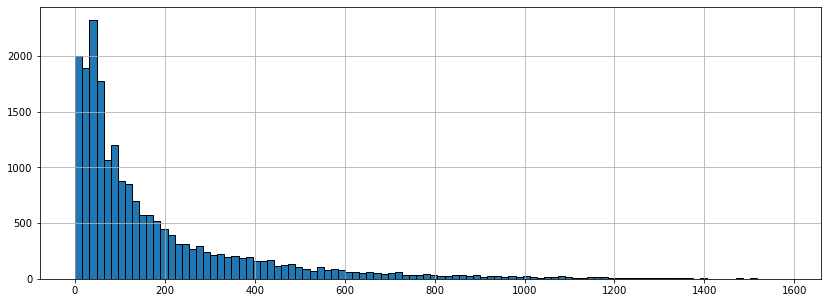

In [39]:
print(df['days_exposition'].describe())
df['days_exposition'].hist(bins=100, figsize=(14, 5), ec='black');

Здесь мы видим что основная часть квартир продавалась примерно до 100 дней. Медианой является 95 дней, в то время как среднее 180 дней.   
Построим диаграмму размаха для кол-ва дней, ограничив максимальное значение в 600 дней.

(0.0, 600.0)

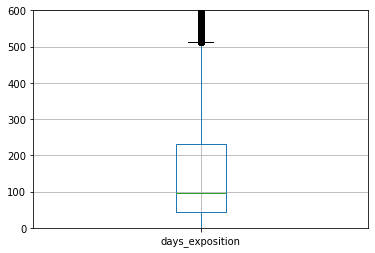

In [40]:
df.boxplot('days_exposition');
plt.ylim(0, 600)

По диаграмме размаха можно сказать что квартиры в соновном продаются от 45 до 250 дней.   
Ограничим данные для гисторгаммы в 500 дней, что бы убрать выбросы и более детально рассмотреть гистограмму.

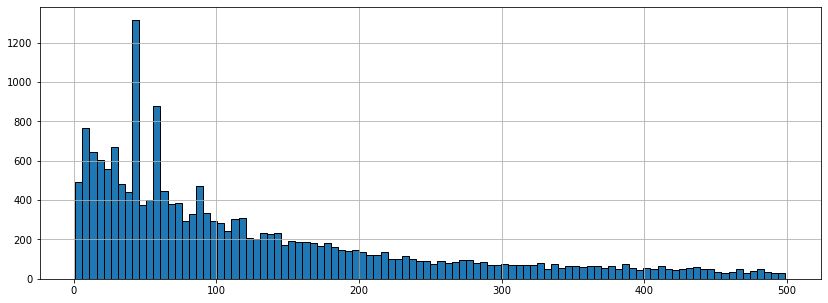

In [41]:
df.query('days_exposition < 500')['days_exposition'].hist(bins=100, figsize=(14, 5), ec='black');

Видны некоторые выбросы в райное 50, 60, и 90 дней. Рассмотрим детальнее эти значения.

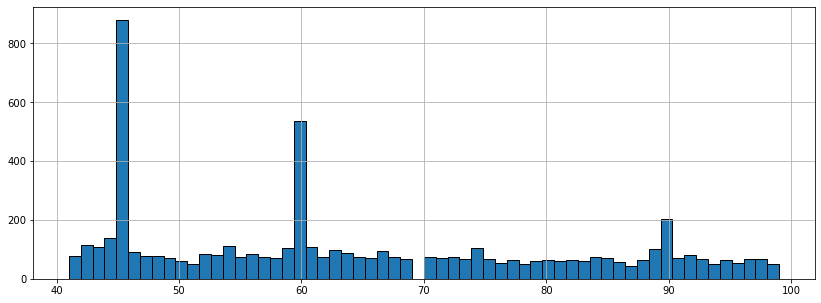

In [42]:
df.query('40 < days_exposition < 100')['days_exposition'].hist(bins=60, figsize=(14, 5), ec='black');

**Вывод**   
На графике видны выборсы на 45, 60 и 90 дней. Возможно это автоматическое снятие объявления или что-то в этом роде. В любом случае в дальнейшем это лучше уточнить у тех кто собирает эти данные. Сейчас же мы будем убирать эти данные из исследования, что бы сделать выборку правдободобной.   

### Редкие и выбивающиеся значения времени продажи квартиры    
В предыдущем пункте мы вявили выбросы на 45, 60 и 90 дней. Удалим эти значения из выборки и создадим новый датафрейм, так как фактической продажи квартир в эти сроки скорее всего не было в таком кол-ве.

In [43]:
good_df = df.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

Построим диаграмму размаха, гистограмму и вызовем метод `.describe()` что бы изучить данные после удаления выбросов.

count    18896.000000
mean       191.640188
std        225.707795
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64


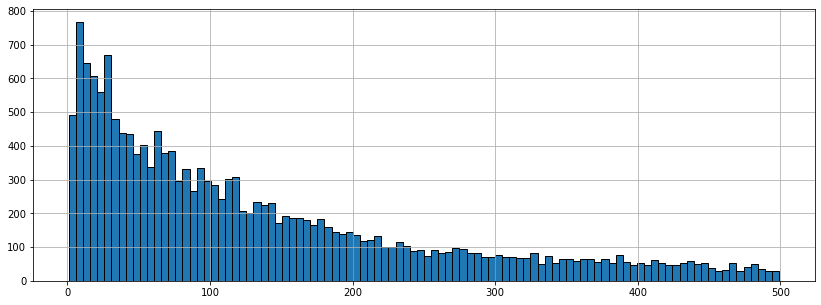

(0.0, 600.0)

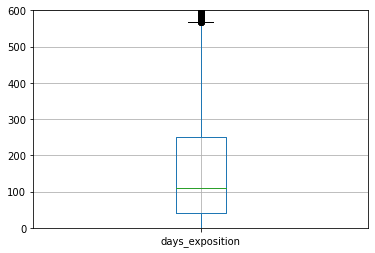

In [44]:
print(good_df['days_exposition'].describe())
good_df.query('days_exposition < 500')['days_exposition'].hist(bins=100, figsize=(14, 5), ec='black');
plt.show()
good_df.boxplot('days_exposition');
plt.ylim(0, 600)

**Вывод**   
Мы видим что медиана сместилась к 110 дням, среднее к 191 дню. Верхние "усы" теперь расположены ближе к 600 дням, что говорит о том что квартиры в основном продаются максимум за 600 дней и минимум за 2-3 дня. 

### Факторы влияющие на стоимость квартиры   
Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

#### Зависимость цены от площади   
Перед построением графика вспомним диапазоны нормальных значений полученные из графиков размаха:
- `total_area` - 18 - 130 м²
- `last_price` - 0 - 12 млн р.   
Используем эти диапазоны для исследования зависимости

Значение корреляции Пирсона 0.65


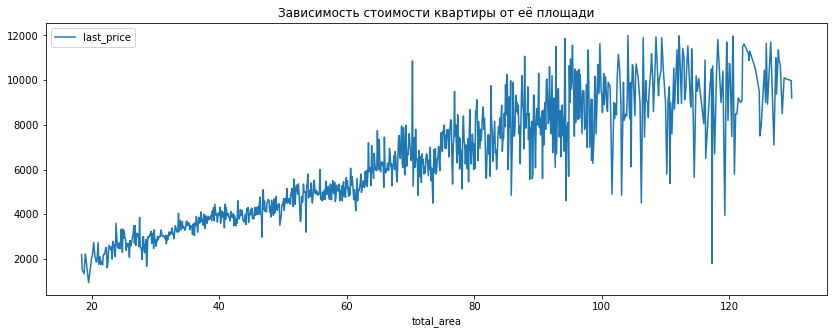

In [45]:
print('Значение корреляции Пирсона', df['total_area'].corr(df['last_price']).round(2))
(
    df.query('18 < total_area < 130 and last_price < 12000')
    .groupby('total_area').median()['last_price'].reset_index().sort_values(by='total_area')
    .plot(
        x='total_area', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от её площади')
);

**Вывод**   
Значение корреляции Пирсона 0,65. Что так же подтверждается графиком. С увеличением площади квартиры её стоимсоть увеличивается.

#### Зависимость цены от числа комнат   
Перед построением графика вспомним диапазоны нормальных значений полученные из графиков размаха:
- `last_price` - 0 - 12 млн р. 
- `rooms` - 0 - 6 комнат   
Используем эти диапазоны для исследования зависимости

Значение корреляции Пирсона 0.36


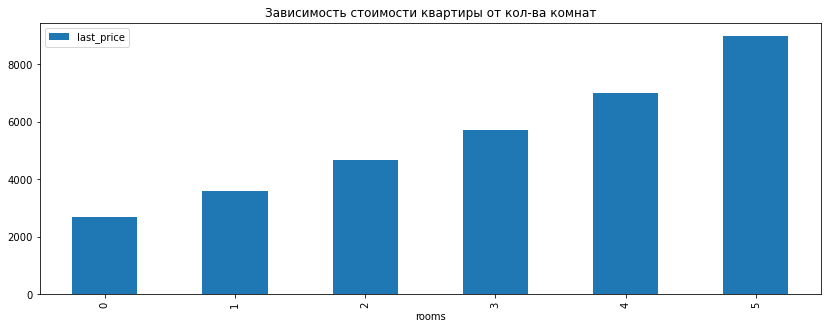

In [46]:
print('Значение корреляции Пирсона', df['rooms'].corr(df['last_price']).round(2))
(
    df.query('rooms < 6 and last_price < 12000')
    .groupby('rooms').median()['last_price'].reset_index().sort_values(by='rooms')
    .plot(
        x='rooms', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от кол-ва комнат', 
        kind='bar')
);

**Вывод**   
Значение корреляции Пирсона не значительное 0,36. По графику точно можно сказать что с увеличением кол-ва комнат стоимость квартиры растёт.

#### Зависимость цены от удалённости от центра 
Перед построением графика вспомним диапазоны нормальных значений полученные из графиков размаха:
- `last_price` - 0 - 12 млн р.    
Используем эти диапазоны для исследования зависимости

Перед построением графика добавим в наш датафрейм столбец значения удалённости от центра в километрах.

In [47]:
df['city_centers_neareast_km'] = (df['city_centers_neareast'] / 1000).round().astype('int')

Теперь построим график рссеивания цен от удалённости от центра в километрах.

Значение корреляции Пирсона -0.27


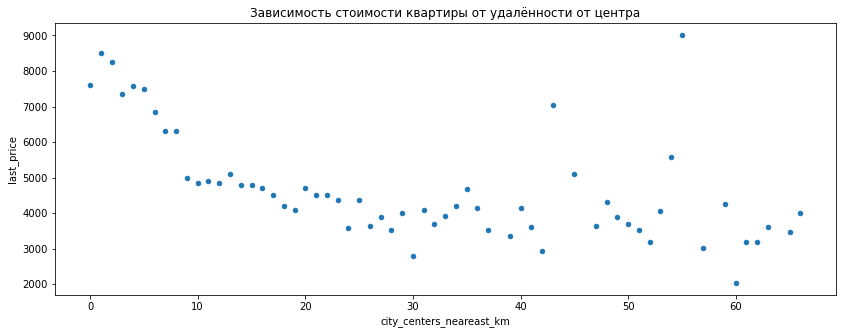

In [48]:
print('Значение корреляции Пирсона', df['city_centers_neareast_km'].corr(df['last_price']).round(2))
(
    df.query('last_price < 12000')
    .groupby('city_centers_neareast_km').median()['last_price'].reset_index().sort_values(by='city_centers_neareast_km')
    .plot(
        x='city_centers_neareast_km', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от удалённости от центра', 
        kind='scatter')
);

**Вывод**   
Значение корреляции Пирсона не значительное -0,27. По графику можно сказать что чем дальше от центра, тем дешевле квартиры. Имеются так же некотрые выбросы в стоимости примерно в 43 и 55 км от центра, возможно это коттеджи или что-то в этом роде.

#### Зависимость цены от этажа квартиры   
Перед построением графика вспомним диапазоны нормальных значений полученные из графиков размаха:
- `last_price` - 0 - 12 млн р.    
Используем эти диапазоны для исследования зависимости

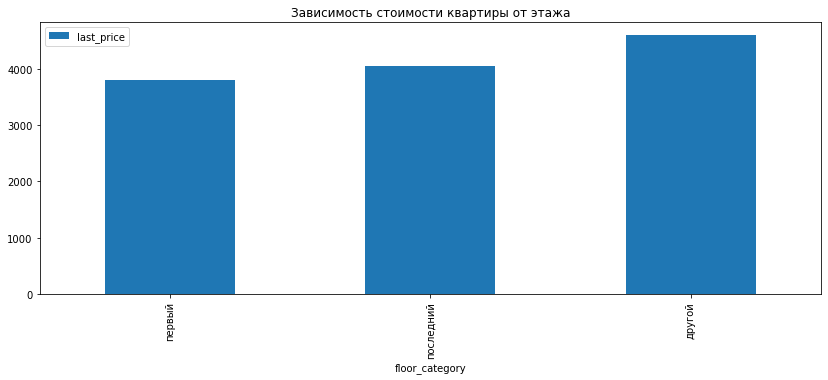

In [49]:
(
    df.query('last_price < 12000')
    .groupby('floor_category').median()['last_price'].reset_index().sort_values(by='last_price')
    .plot(
        x='floor_category', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от этажа', 
        kind='bar')
);

**Вывод**   
Здесь можем сказать что квартиры на первом этаже самые дешёвые, на последнем этаже чуть дороже но всё же дешевле чем на остальных.

#### Зависимость цены от даты размещения   
Перед построением графиков вспомним диапазон нормальных значений полученные из графиков размаха:
- `last_price` - 0 - 12 млн р.    
Используем этот диапазон для исследования зависимости 

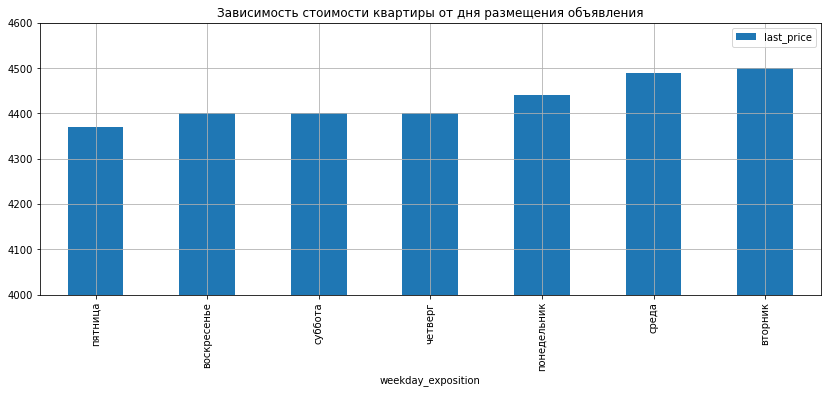

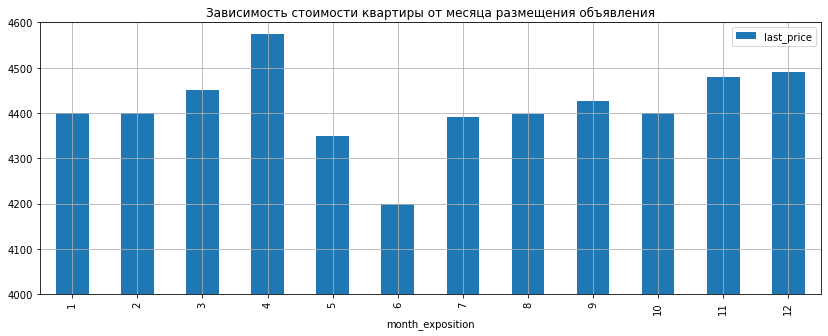

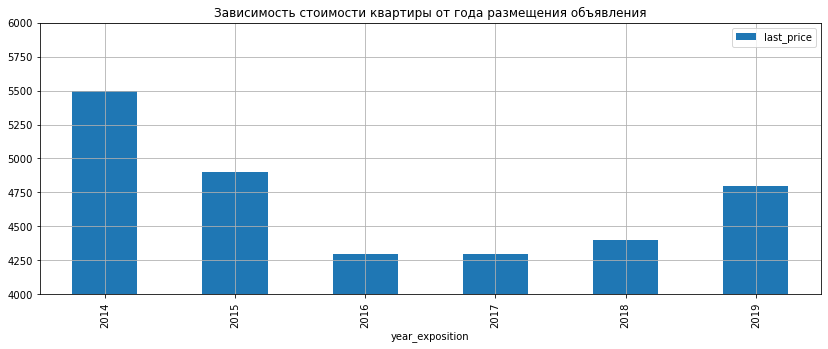

In [50]:
(
    df.query('last_price < 12000')
    .groupby('weekday_exposition').median()['last_price'].reset_index().sort_values(by='last_price')
    .plot(
        x='weekday_exposition', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от дня размещения объявления', 
        kind='bar', ylim=(4000,4600), grid=True)
);
(
    df.query('last_price < 12000')
    .groupby('month_exposition').median()['last_price'].reset_index().sort_values(by='month_exposition')
    .plot(
        x='month_exposition', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от месяца размещения объявления', 
        kind='bar', ylim=(4000,4600), grid=True)
);
(
    df.query('last_price < 12000')
    .groupby('year_exposition').median()['last_price'].reset_index().sort_values(by='year_exposition')
    .plot(
        x='year_exposition', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от года размещения объявления', 
        kind='bar', ylim=(4000, 6000), grid=True)
);

**Вывод**   
- Зависимость цены от ***дня недели*** не ярко выражена. Можно лишь сказать что стоимость квартир выложенных в будние дни чуть выше, чем в выходные. Возможно это связано с тем что в будние дни объявления добавляются в основном риелторами, котрые ориентируются в ценах несколько лучше и имеют в этом финансовый интерес.   
- Зависимость цены от ***месяца*** подачи объявления имеется. Здесь мы скорее всего видим сезонность. К лету стоимость квартир несколько ниже, так как ниже и спрос. В середине лета спрос начинает восстанавливаться и стоимость квартир повышается. В начале года квартиры имеют меньшую стоимость по сравнению с концом года.   
- Зависимость цены от ***года*** подачи объявления так же имеется. Здесь мы наблюдаем спад стоимости недвижимости в 2016-2017 годах. В 2018-2019 стоимость вновь начала подниматься. Это могло быть связано с разными факторами в экономике и спросом на вторичную недвижимость.

### Срез по 10 населённым пунктам с наибольшим числом объявлений. 
Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.   
Посмотрим какие населённые пункты, которые входят в топ 10 по кол-ву объявлений.

In [51]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15747
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Создадим сводную таблицу по этим 10 населённым пунктам.

In [52]:
top10 = df['locality_name'].value_counts().head(10).index.tolist()
(
    df.query('locality_name in @top10')
    .pivot_table(
        index='locality_name', 
        values=['price_per_square', 'last_price'], 
        aggfunc='median')
    .sort_values(by='last_price')
)

,last_price,price_per_square
locality_name,,
Выборг,2897,58.1580
Гатчина,3100,67.7960
посёлок Мурино,3400,85.8900
Всеволожск,3450,65.7890
Колпино,3600,74.7235
деревня Кудрово,3790,91.8600
посёлок Шушары,3950,76.8760
посёлок Парголово,4100,91.6420
Пушкин,5180,100.0000


**Вывод**   
Самые дорогие квартиры расположены в Санкт-Петербурге и Пушкине, самые дешёвые в Выборге и Гатчине. Медианная цена за квадратный метр имеет несколько другие значения, но лидеры остаются прежними.

### Выделение квартир в Санкт-Петербурге   
Здесь мы выясним, какая область входит в центр. Посчитаем среднюю цену для каждого километра. Построим график: как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.   
Для начала построим график для всех цен в выборке для города Санкт-Петербург

,city_centers_neareast_km,last_price
0,0,17900.0
1,1,11490.0
2,2,10000.0
3,3,8409.0
4,4,9200.0
5,5,9490.0
6,6,8900.0
7,7,7800.0
8,8,7440.0
9,9,5300.0


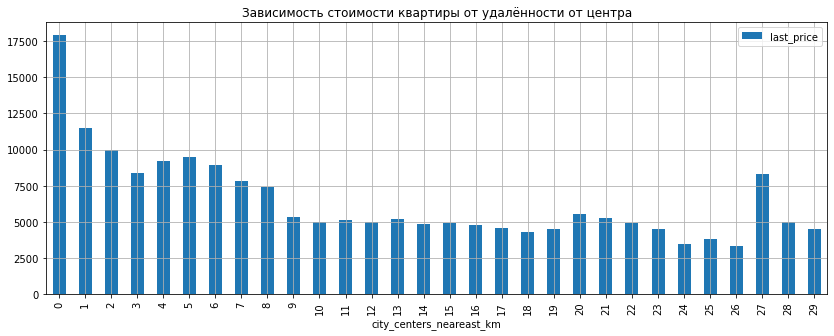

In [53]:
display(df.query('locality_name == "Санкт-Петербург"')
        .groupby('city_centers_neareast_km').median()['last_price'].reset_index())
(
    df.query('locality_name == "Санкт-Петербург"')
    .groupby('city_centers_neareast_km').median()['last_price'].reset_index()
    .sort_values(by='city_centers_neareast_km')
    .plot(
        x='city_centers_neareast_km', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от удалённости от центра', 
        kind='bar', 
        grid=True)
);

**Вывод**   
Самые дорогие квартиры расположеные в центре Санкт-Петербурга находятся в радиусе 8 км. На графике виден отчётливый перепад для 8 км от центра в ~2 млн.р.

### Исследование сегмента квартир в центре Санкт-Петербурга
Изучим следующие параметры: площадь, цена, число комнат, высота потолков.   
Также выделим факторы, которые влияют на стоимость квартиры в центре Санкт-Петербурга: число комнат, этаж, удалённость от центра, дата размещения объявления.   
Для начала сделаем срез наших данных по квартирам в центре города Санкт-Петербурга

In [54]:
spb_center = df.query('locality_name == "Санкт-Петербург" and city_centers_neareast_km <= 8')

#### Площадь, цена, число комнат и высота потолков в центре Санкт-Петербурга   
Вызовем метод `describe()` и построим диаграммы размаха для этих параметров.

,total_area,last_price,rooms,ceiling_height
count,4140.000000,4140.000000,4140.000000,4133.000000
mean,90.282126,14157.877536,2.757971,3.043247
std,58.791793,23534.202297,1.424214,1.764267
min,12.000000,1600.000000,0.000000,2.000000
25%,55.000000,6450.000000,2.000000,2.700000
50%,76.000000,8950.000000,3.000000,3.000000
75%,107.000000,13900.000000,3.000000,3.200000
max,900.000000,763000.000000,19.000000,100.000000


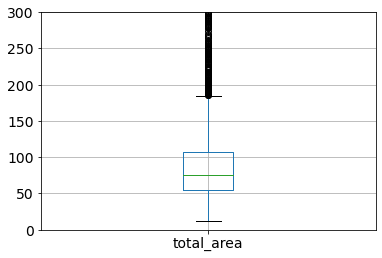

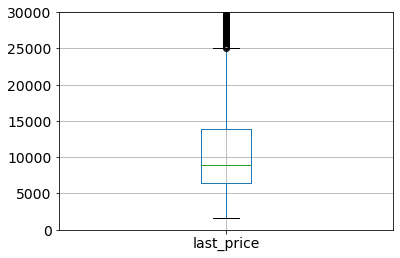

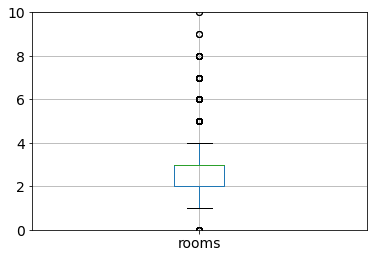

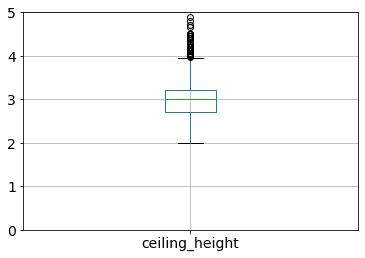

In [55]:
display(spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe())
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [300, 30000, 10, 5]

for i in range(len(ylims)):
    spb_center.boxplot(column_list[i], fontsize=14)
    plt.ylim(0, ylims[i])
    plt.show()

Здесь мы можем определить примерные границы нормальных значений и посмотреть как они отличались для квартир из всей выборки:   
- `total_area` - Для Санкт-Петербурга: 18 - 180 м², для всей выборки: 18 - 130 м²;
- `last_price` - Для Санкт-Петербурга: 2,5 - 25 млн.р., для всей выборки: 0 - 12 млн р.;
- `rooms` - Для Санкт-Петербурга: 1 - 4 комнат, для всей выборки: 0 - 6 комнат;
- `ceiling_height` -  Для Санкт-Петербурга: 2,4 - 4 м, для всей выборки: 2,3 - 3,3 м. 

Построим гистограммы по этим столбцам

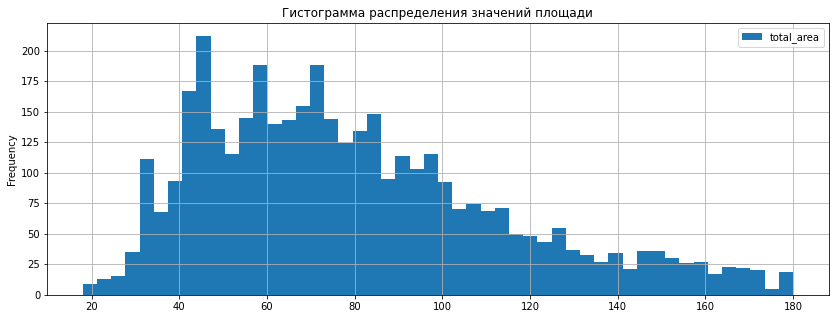

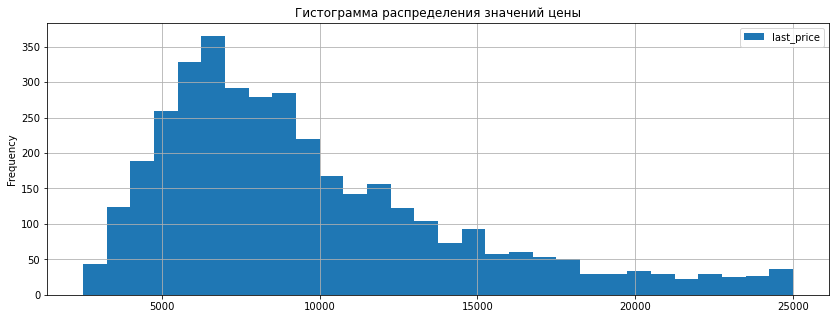

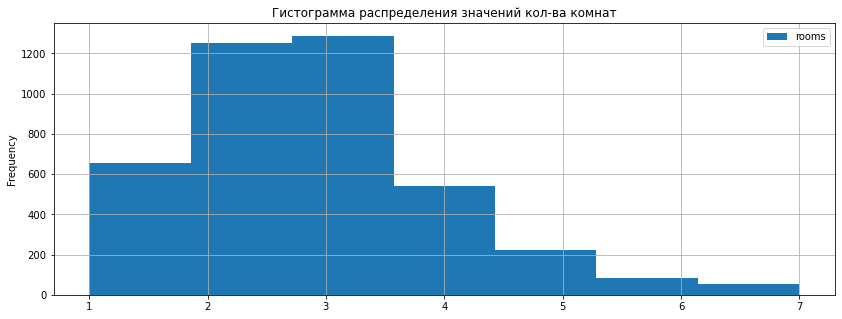

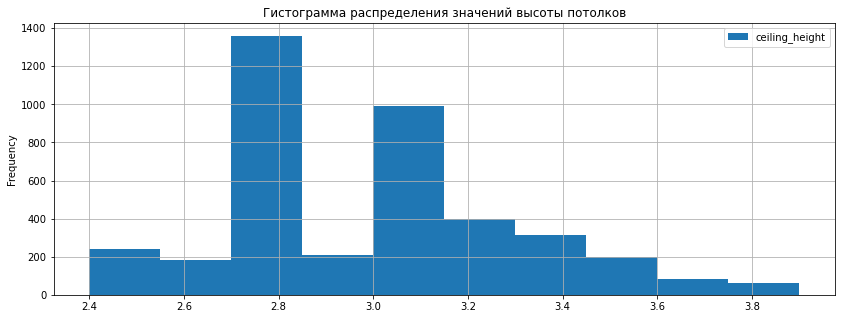

In [56]:
spb_center.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (14,5), range=(18,180), title='Гистограмма распределения значений площади');
spb_center.plot(y = 'last_price', kind = 'hist', bins = 30, grid=True, figsize = (14,5), range=(2500,25000), title='Гистограмма распределения значений цены');
spb_center.plot(y = 'rooms', kind = 'hist', bins = 7, grid=True, figsize = (14,5), range=(1,7), title='Гистограмма распределения значений кол-ва комнат');
spb_center.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (14,5), range=(2.4, 3.9), title='Гистограмма распределения значений высоты потолков');

**Вывод**   
1. **Гистограмма распределения значений площади** - Основная доля квартир имеет метраж от 40 до 100 м², пик приходится на 70 м². Квартиры в центре Санкт-Петербурга явно больше по площади чем в целом по области.
2. **Гистограмма распределения значений цены** - Цены варьируются в пределах от 2.5 до 25 млн.р. Чаще всего квартиры имеют стоимость от 5 до 9 млн.р. Квартиры в центре Санкт-Петербурга дороже чем в среднем по области.   
3. **Гистограмма распределения значений кол-ва комнат** - Чаще всего встречаются 2-х и 3-х комнатные квартиры, по области чаще встречались 1 и 2-х комнатные квартиры.   
4. **Гистограмма распределения значений высоты потолков** - Чаще всего встречаются квартиры с потолками от 2,8 до 3,4 м, по области чаще встречались потолки 2,5 до 3,2 м.

#### Факторы влияющие на стоимость квартиры   
Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

##### Зависимость цены от площади   
Перед построением графика вспомним диапазоны нормальных значений полученные из графиков размаха:
- `total_area` - 18 - 130 м²
- `last_price` - 2,5 - 25 млн р.   
Используем эти диапазоны для исследования зависимости

Значение корреляции Пирсона 0.65


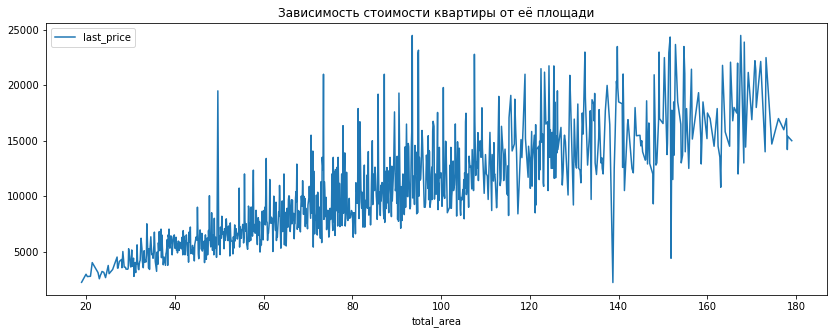

In [57]:
print('Значение корреляции Пирсона', df['total_area'].corr(df['last_price']).round(2))
(
    spb_center.query('18 < total_area < 180 and last_price < 25000')
    .groupby('total_area').median()['last_price'].reset_index().sort_values(by='total_area')
    .plot(
        x='total_area', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от её площади')
);

**Вывод**   
Всё так же как и для всей выборки. Значение корреляции Пирсона 0,65. Что так же подтверждается графиком. С увеличением площади квартиры её стоимсоть увеличивается.

##### Зависимость цены от числа комнат   
Перед построением графика вспомним диапазоны нормальных значений полученные из графиков размаха:
- `last_price` - 2.5 - 25 млн р. 
- `rooms` - 1 - 4 комнат   
Используем эти диапазоны для исследования зависимости

Значение корреляции Пирсона 0.36


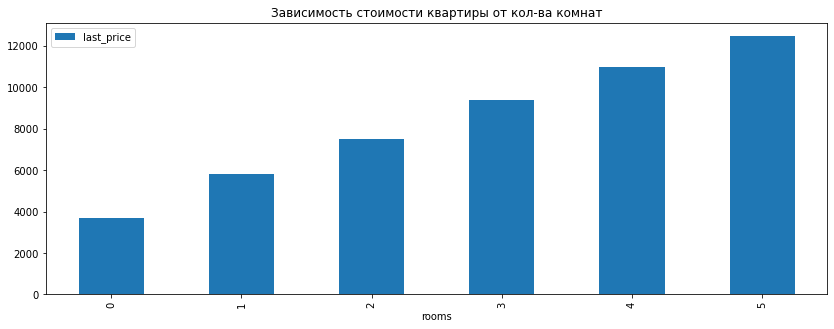

In [58]:
print('Значение корреляции Пирсона', df['rooms'].corr(df['last_price']).round(2))
(
    spb_center.query('rooms < 6 and last_price < 25000')
    .groupby('rooms').median()['last_price'].reset_index().sort_values(by='rooms')
    .plot(
        x='rooms', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от кол-ва комнат', 
        kind='bar')
);

**Вывод**   
Всё так же как и для всей выборки. Значение корреляции Пирсона не значительное 0,36. По графику точно можно сказать что с увеличением кол-ва комнат стоимость квартиры растёт.

##### Зависимость цены от удалённости от центра 
Перед построением графика вспомним диапазоны нормальных значений полученные из графиков размаха:
- `last_price` - 2.5 - 25 млн р.    
Используем эти диапазоны для исследования зависимости

Значение корреляции Пирсона -0.27


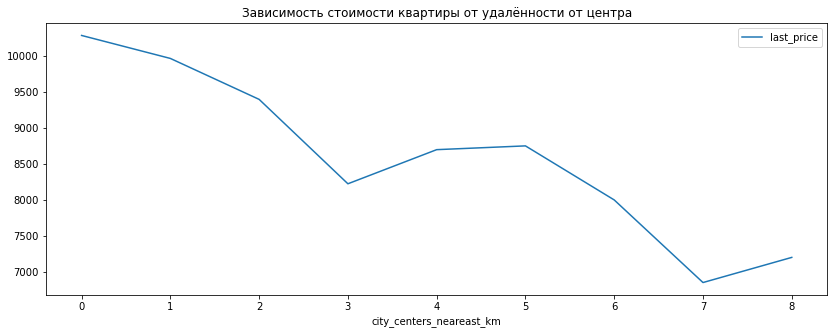

In [59]:
print('Значение корреляции Пирсона', df['city_centers_neareast_km'].corr(df['last_price']).round(2))
(
    spb_center.query('last_price < 25000')
    .groupby('city_centers_neareast_km').median()['last_price'].reset_index().sort_values(by='city_centers_neareast_km')
    .plot(
        x='city_centers_neareast_km', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от удалённости от центра')
);

**Вывод**   
Всё так же как и для всей выборки. Значение корреляции Пирсона не значительное -0,27. По графику можно сказать что чем дальше от центра, тем дешевле квартиры.

##### Зависимость цены от этажа квартиры   
Перед построением графика вспомним диапазоны нормальных значений полученные из графиков размаха:
- `last_price` - 2.5 - 25 млн р.    
Используем эти диапазоны для исследования зависимости

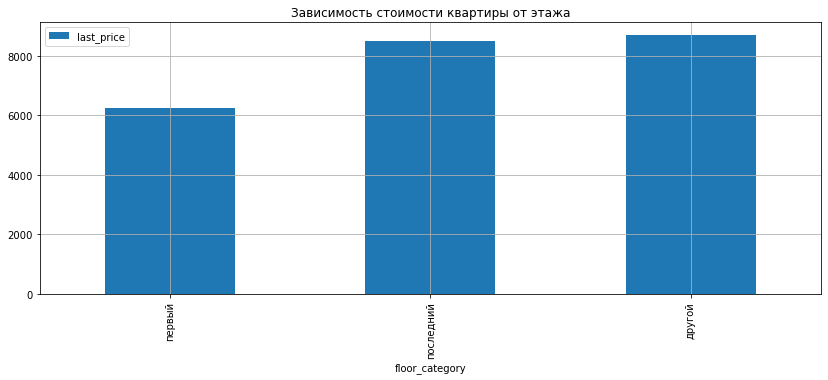

In [60]:
(
    spb_center.query('last_price < 25000')
    .groupby('floor_category').median()['last_price'].reset_index().sort_values(by='last_price')
    .plot(
        x='floor_category', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от этажа', 
        kind='bar',
        grid=True)
);

**Вывод**   
Здесь мы видим некотрое различие. Квартиры на первом этаже всё так же дешевле, но разница между квартирами на последнем и других этажах минимальна. Вполне возможно что здесь включены модные лофты Санкт-Петербурга.

##### Зависимость цены от даты размещения   
Перед построением графиков вспомним диапазон нормальных значений полученные из графиков размаха:
- `last_price` - 2,5 - 25 млн р.    
Используем этот диапазон для исследования зависимости 

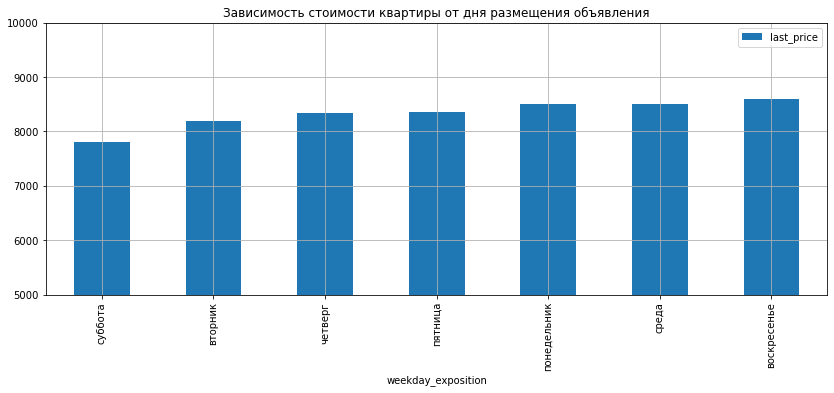

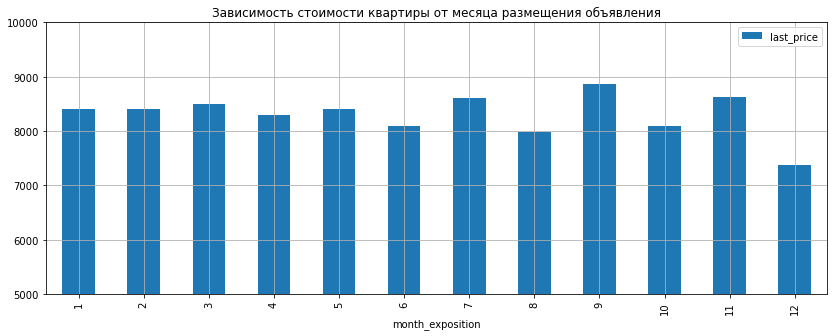

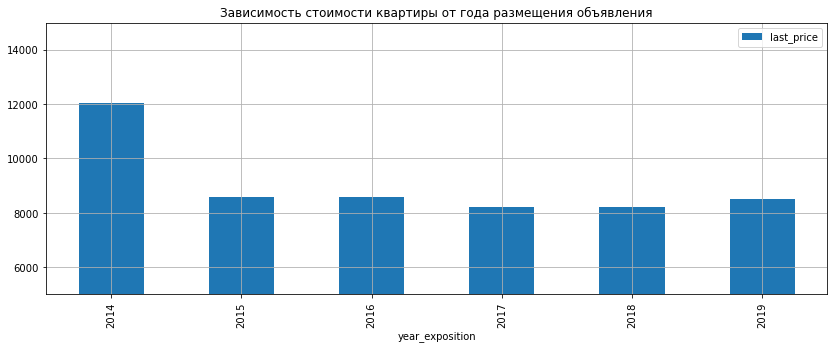

In [61]:
(
    spb_center.query('last_price < 25000')
    .groupby('weekday_exposition').median()['last_price'].reset_index().sort_values(by='last_price')
    .plot(
        x='weekday_exposition', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от дня размещения объявления', 
        kind='bar', ylim=(5000, 10000), grid=True)
);
(
    spb_center.query('last_price < 25000')
    .groupby('month_exposition').median()['last_price'].reset_index().sort_values(by='month_exposition')
    .plot(
        x='month_exposition', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от месяца размещения объявления', 
        kind='bar', ylim=(5000, 10000), grid=True)
);
(
    spb_center.query('last_price < 25000')
    .groupby('year_exposition').median()['last_price'].reset_index().sort_values(by='year_exposition')
    .plot(
        x='year_exposition', 
        y='last_price', 
        figsize=(14,5), 
        title='Зависимость стоимости квартиры от года размещения объявления', 
        kind='bar', ylim=(5000, 15000), grid=True)
);

**Вывод**   
- Зависимость цены от ***дня недели*** имеет некоторое отличие. В воскресенье стоимость самая высокая, но в субботу всё так же самая низкая.   
- Зависимость цены от ***месяца*** здесь мы уже не видим такой же сезонности и стоимость квартир в начале года больше чем с концом года, противоположенно тому, что мы наблюдали для всей выборки.  
- Зависимость цены от ***года*** Здесь мы так же наблюдаем спад стоимости недвижимости, но уже 2017-2018 годах. В 2019 стоимость вновь начала подниматься. Так же мы видим возможный резкий спад после 2014 года, но утверждать пока не будем. Посмотрим что входило в этот 2014 год. 

Для начала просто изучим что нам даст метод `.describe()`

In [62]:
spb_center.query('year_exposition == 2014')[['last_price', 'city_centers_neareast_km']].describe()

,last_price,city_centers_neareast_km
count,34.000000,34.000000
mean,23163.588235,5.029412
std,19104.927741,2.138894
min,5350.000000,0.000000
25%,9025.000000,4.000000
50%,17300.000000,5.000000
75%,27762.250000,6.000000
max,79339.000000,8.000000


Теперь всё встало на свои места. Это не квартиры стоили дороже в 2014 году, а в 2014 году в записях всего 34 дорогих квартиры из центра Сакт-Петербурга. 

## Общий вывод

Перед написанием общего вывода выведем тепловую карту корреляции цены к другим параметрам.

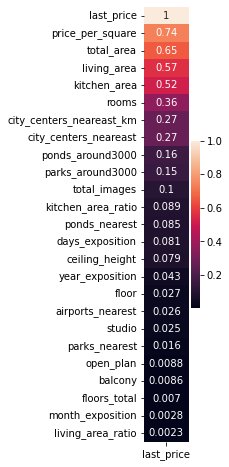

In [63]:
plt.figure(figsize=(1,8))
sns.heatmap(abs(df.corr()[['last_price']]).sort_values(by='last_price', ascending=False), annot=True);

Сведём результаты в таблицу:

<table><tbody>
    <tr>
        <td><b>Параметры</b></td>
        <td><b>Зависимость</b></td>
    </tr>
    <tr>
        <td>Площадь</td>
        <td>Чем больше площадь, тем выше стоимость</td>
    </tr>
    <tr>
        <td>Кол-во комнат</td>
        <td>Чем больше комнат, тем выше стоимость</td>
    </tr>
    <tr>
        <td>Удаленность от центра</td>
        <td>Чем ближе к центру, тем выше стоимость</td>
    </tr>
    <tr>
        <td>День размещения объявления</td>
        <td>В будние дни квартиры стоят чуть дороже</td>
    </tr>
    <tr>
        <td>Месяц размещения объявления</td>
        <td>Наблюдается сезонность.<div>Ближе к лету начинается спад спроса,<div>а соответсвенно и цен на недвижимость</td>
    </tr>
    <tr>
        <td>Год размещения объявления</td>
        <td>Дешевле всего квартиры стояли в 2017 году</td>
    </tr></tbody>
</table>

Многие из этих параметров имеют довольно слабую зависимость, но если их объединить по группам, то, наверняка, можно построить довольно хорошую систему определения рыночной стоимости объектов недвижимости